In [1]:
# %load ml.py
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df=pd.read_csv('./data/homeprices3.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
dummies=pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
merged=pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
final=merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

In [6]:
final=final.drop(['west windsor'],axis=1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
X=final.drop(['price'], axis=1)
X

y=final['price']
y

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
lr=linear_model.LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
predicted=lr.predict(X)
predicted

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [10]:
lr.score(X,y) # here X returns the predicted values

0.9573929037221873

In [11]:
lr.predict([[3400, 0, 0]])  # 3400 sqr ft home in west windsor

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([681241.66845839])

In [12]:
lr.predict([[2800, 0, 1]]) # 2800 sqr ft home in robbinsville

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([590775.63964739])

### Using sklearn OneHotEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
dfle=df

dfle['town']=le.fit_transform(dfle['town'])
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [15]:
X=dfle[['town', 'area']].values
X

y=dfle['price'].values
y

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [16]:
# use one hot encoder to create dummy variables for each of the town

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([('town', OneHotEncoder(), [0])], remainder='passthrough')

```python
ohe = OneHotEncoder(categorical_features = [0])
X = ohe.fit_transform(X).toarray()
```

Categorical_feartures is a parameter that specifies what column we want to one hot encode, and since we want to encode the first column, we put [0]. Finally, we fit_transform into binary, and turn it into an array so we can work with it easily going forward.

In [17]:
X=ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [18]:
X=X[:, 1:] # remove one label
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [19]:
lr.fit(X, y)

LinearRegression()

In [20]:
lr.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277575])

In [21]:
lr.score(X, y)

0.9573929037221874

In [22]:
lr.predict([[0, 1, 3400]]) # 3400 sqr ft home in west windsor
lr.predict([[1,0, 2800]]) # 2800 sqr ft home in fobbinsville

array([681241.6684584])

array([590775.63964739])

### Exercise

`carprices.csv` file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [23]:
df=pd.read_csv('./data/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [25]:
df.shape

(13, 4)

In [26]:
def corr_report(df):
    results=[]
    target=input('Enter your target: ') # enter 'Sell Price($)'
    col_names=list(df.columns)
    col_names.remove(target)
   
    for i in col_names:
        if df[i].dtype!='object':
            val=df[i].corr(df[target])
            results.append(f'The correlation of {i} and {target} is {round(val,2)}')
            
            
    for result in results:
        print(result)

corr_report(df)


Enter your target: Sell Price($)
The correlation of Mileage and Sell Price($) is -0.93
The correlation of Age(yrs) and Sell Price($) is -0.92


Text(0, 0.5, 'Sell Price($)')

Text(0.5, 0, 'MIleage')

Text(0.5, 0, 'Age(yrs)')

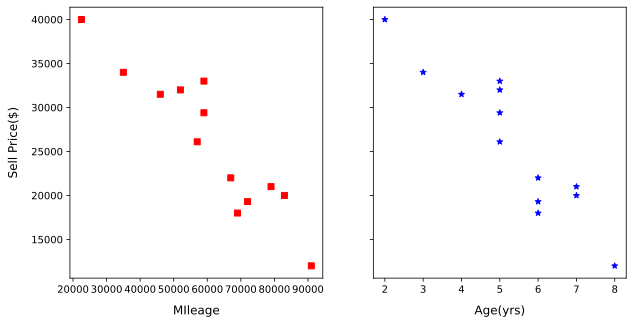

In [27]:
fig, (ax1, ax2)=plt.subplots(figsize=(10, 5),nrows=1, ncols=2, sharey=True)
ax1.scatter(df['Mileage'], df['Sell Price($)'], color='red', marker='s')
ax1.set_ylabel('Sell Price($)', fontsize=12)
ax1.set_xlabel('MIleage', fontsize=12)
ax1.yaxis.set_label_coords(-0.2, 0.5)
ax1.xaxis.set_label_coords(0.5, -0.1)

ax2.scatter(df['Age(yrs)'], df['Sell Price($)'], color='blue', marker='*')
ax2.set_xlabel('Age(yrs)', fontsize=12)
ax2.xaxis.set_label_coords(0.5, -0.1)


In [28]:
bmw=df[df['Car Model']=='BMW X5']
bmw

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [29]:
audi=df[df['Car Model']=='Audi A5']
audi

,Car Model,Mileage,Sell Price($),Age(yrs)
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8


In [30]:
benz=df[df['Car Model']=='Mercedez Benz C class']
benz

,Car Model,Mileage,Sell Price($),Age(yrs)
9,Mercedez Benz C class,67000,22000,6
10,Mercedez Benz C class,83000,20000,7
11,Mercedez Benz C class,79000,21000,7
12,Mercedez Benz C class,59000,33000,5


In [31]:
dummies_car_model=pd.get_dummies(df['Car Model'])
dummies_car_model

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [32]:
dummies_car_model=dummies_car_model.drop('Mercedez Benz C class', axis=1)
dummies_car_model

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [33]:
final=pd.concat([ dummies_car_model, df], axis=1)
final

,Audi A5,BMW X5,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,1,BMW X5,69000,18000,6
1,0,1,BMW X5,35000,34000,3
2,0,1,BMW X5,57000,26100,5
3,0,1,BMW X5,22500,40000,2
4,0,1,BMW X5,46000,31500,4
5,1,0,Audi A5,59000,29400,5
6,1,0,Audi A5,52000,32000,5
7,1,0,Audi A5,72000,19300,6
8,1,0,Audi A5,91000,12000,8
9,0,0,Mercedez Benz C class,67000,22000,6


In [34]:
final=final.drop('Car Model', axis=1)
final

,Audi A5,BMW X5,Mileage,Sell Price($),Age(yrs)
0,0,1,69000,18000,6
1,0,1,35000,34000,3
2,0,1,57000,26100,5
3,0,1,22500,40000,2
4,0,1,46000,31500,4
5,1,0,59000,29400,5
6,1,0,52000,32000,5
7,1,0,72000,19300,6
8,1,0,91000,12000,8
9,0,0,67000,22000,6


In [35]:
X=final.drop('Sell Price($)', axis=1)
X
y=final['Sell Price($)']
y

,Audi A5,BMW X5,Mileage,Age(yrs)
0,0,1,69000,6
1,0,1,35000,3
2,0,1,57000,5
3,0,1,22500,2
4,0,1,46000,4
5,1,0,59000,5
6,1,0,52000,5
7,1,0,72000,6
8,1,0,91000,8
9,0,0,67000,6


0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [36]:
lr=linear_model.LinearRegression()

In [37]:
lr.fit(X, y)

LinearRegression()

In [38]:
lr.predict(X)

array([18705.27236441, 35286.78445646, 24479.19112468, 41245.76426393,
       29882.98779057, 28023.6135243 , 30614.46818502, 21879.57266963,
       12182.34562102, 26183.72387884, 18929.31674101, 20409.80511856,
       30477.15426156])

In [39]:
lr.score(X, y)

0.9417050937281083

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [40]:
lr.predict([[0,0, 45000,4]])

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([36991.31721061])

In [41]:
lr.predict([[0,1, 86000,7]])

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([11080.74313219])

#### OneHotEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
dfle=df
dfle['Car Model']=le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [44]:
X=dfle.drop('Sell Price($)', axis=1).values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [45]:
y=dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [46]:
# create dummy variables using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')

X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [47]:
X=X[:, 1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [48]:
lr.fit(X, y)

LinearRegression()

In [49]:
lr.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387885, 18929.31674102, 20409.80511857,
       30477.15426157])

In [50]:
lr.predict([[0,1,45000, 4]])
lr.predict([[1,0,86000, 7]])

array([36991.31721062])

array([11080.74313219])